In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys
pkg_path = "/nfs/homedirs/yuny/project-1/audio_classification"
if pkg_path not in sys.path:
    sys.path.append(pkg_path)
    
import yaml
import torch
from audio_classification.tools import do_train, get_dataloader, get_transform
from audio_classification.model import LitCRNN

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
with open("/nfs/homedirs/yuny/project-1/audio_classification/configs/crnn_bmw.yaml", "r") as config_file:
    configs = yaml.load(config_file)

In [3]:
import pytorch_lightning as pl
train_loader, val_loader, _, class_weights = get_dataloader(configs, transform=get_transform(configs))
model = LitCRNN(configs, class_weights)

In [4]:
trainer = pl.Trainer()
lr_finder = trainer.tuner.lr_find(model, train_dataloader=train_loader, val_dataloaders=val_loader)

GPU available: True, used: False
TPU available: False, using: 0 TPU cores
Set SLURM handle signals.

   | Name        | Type        | Params
---------------------------------------------
0  | conv1       | Conv2d      | 640   
1  | bn1         | BatchNorm2d | 128   
2  | dropout1    | Dropout     | 0     
3  | conv2       | Conv2d      | 73 K  
4  | bn2         | BatchNorm2d | 256   
5  | dropout2    | Dropout     | 0     
6  | conv3       | Conv2d      | 147 K 
7  | bn3         | BatchNorm2d | 256   
8  | dropout3    | Dropout     | 0     
9  | conv4       | Conv2d      | 147 K 
10 | bn4         | BatchNorm2d | 256   
11 | dropout4    | Dropout     | 0     
12 | rnn         | GRU         | 21 K  
13 | dropout_rnn | Dropout     | 0     
14 | linear      | Linear      | 198   
Finding best initial lr: 100%|██████████| 100/100 [20:22<00:00, 14.29s/it]

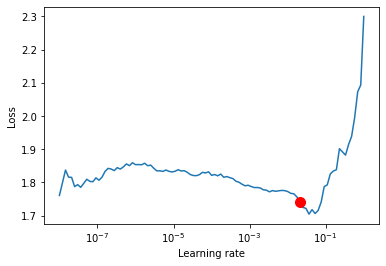

In [6]:
fig = lr_finder.plot(suggest=True)
fig.show()